<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Материалы" data-toc-modified-id="Материалы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Материалы</a></span></li><li><span><a href="#Описание" data-toc-modified-id="Описание-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Пропуски</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Анализ оттока клиентов банка "Метанпром"

## Материалы

* [Презентация](https://disk.yandex.ru/d/Ri_fPocrRcFpMA)
* [Дашборд](https://public.tableau.com/app/profile/alina1408/viz/Banksproductsperuser/Dashboard1#2)

## Описание

Предоставлены данные о клиентах регионального банка "Метанпром", располагающегося в Ярославле и близлежащих городах (Ростов Великий, Рыбинск). На основе полученной информации необходимо определить, какие клиенты чаще уходят из банка. Заказчик проекта - менеджер продукта, разрабатывающий пути по удержанию клиентов.

**Цель исследования** - составить портрет пользователей банка, склонных к оттоку.

**Описание датасета:**
* `userid` — идентификатор пользователя
* `score` — баллы кредитного скоринга
* `City` — город
* `Gender` — пол
* `Age` — возраст
* `Objects` — количество объектов в собственности
* `Balance` — баланс на счёте
* `Products` — количество продуктов, которыми пользуется клиент
* `CreditCard` — есть ли кредитная карта
* `Loyalty` — активный клиент
* `estimated_salary` — заработная плата клиента
* `Churn` — ушёл или нет

**Ход исследования:**
1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Проверка гипотез
5. Выводы

## Обзор данных

Для начала импортируем необходимые для работы библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

%matplotlib inline

Откроем датасет и посмотрим информацию о нём:

In [2]:
path = '//censored//'
bank = pd.read_csv(path + 'censored.csv')

bank.info()
bank.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Так, в таблице 10000 записей (при условии отсутствия дубликатов), пропуски есть только в столбце `Balance`, но их там много (около 40%). Типы данных в столбцах выбраны верные. Стили заголовков небходимо привести к "змеиному регистру". Кроме того, надо проверить таблицу на наличие явных и неявных дубликатов.

Таким образом, перед началом исследования необходимо:
1. Привести заголовки к "змеиному регистру".
2. Проверить таблицу на наличие дубликатов.
3. Поработать с пропусками.

## Предобработка данных

### Стиль заголовков

Приведём все заголовки к нижнему регистру и добавим нижние подчёркивания между словами:

In [3]:
bank.columns = bank.columns.str.lower()
bank = bank.rename(columns={'userid':'user_id', 'creditcard':'credit_card'})

bank.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

Отлично, все столбцы приведены к "змеиному регистру".

### Дубликаты

Проверим датасет на наличие полных дубликатов:

In [4]:
bank.duplicated().sum()

0

Полных дубликатов в таблице нет. Проверим строчные столбцы на наличие неявных дубликактов. Для этого посмотрим на их уникальные значения:

In [5]:
# город:
display(bank['city'].sort_values().unique())

# пол:
bank['gender'].sort_values().unique()

array(['Ростов Великий', 'Рыбинск', 'Ярославль'], dtype=object)

array(['Ж', 'М'], dtype=object)

Так, в таблице нет ни явных, ни неявных дубликатов.

### Пропуски

Поскольку пропусков в столбце `balance` очень много, надо быть аккуратнее с их заполнением. Попробуем выяснить, нет ли сильной зависимости между переменной `balance` и каким-либо ещё фактором, чтобы можно было от чего-то отталкиваться при заполнении. Для этого преобразуем категорияльные переменные с помощью функции `get_dummies` библиотеки `pandas` и сохраним новую таблицу в отдельную переменную:

In [6]:
bank_updated = pd.get_dummies(bank)

bank_updated.head()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,0,0,1,1,0
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,0,0,1,1,0
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


Поскольку пол может принимать только два значения, в данном случае можно оставить только один столбец в виде дамми-переменной:

In [7]:
bank_updated.drop('gender_Ж', axis=1, inplace=True)

# приводим заголовки к более приемлемому виду:
bank_updated.columns = bank_updated.columns.str.lower()
bank_updated = bank_updated.rename(columns={'gender_м':'gender'})

bank_updated.head()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_ростов великий,city_рыбинск,city_ярославль,gender
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,0,0,1,0
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,0,0,1,0
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0


Теперь посмотрим на корреляцию переменной `balance` с другими переменными:

'score - balance'

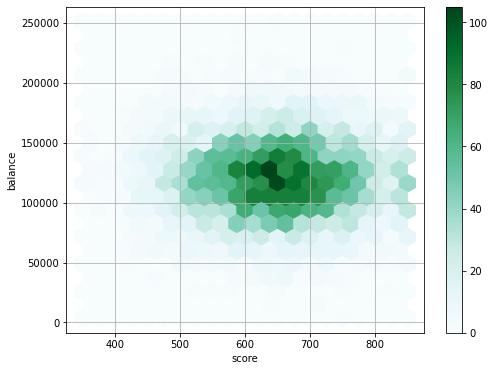

'Коэффициент корреляции между переменными score и balance равен -0.0047441452878730925'

'age - balance'

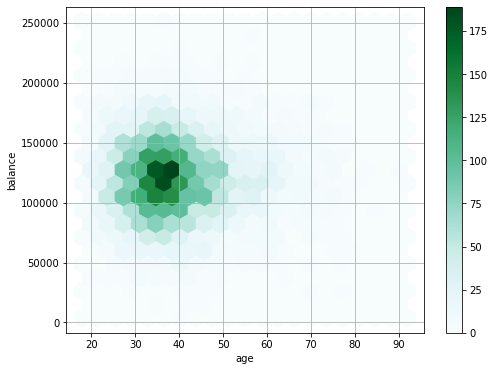

'Коэффициент корреляции между переменными age и balance равен -0.012821960621396537'

'objects - balance'

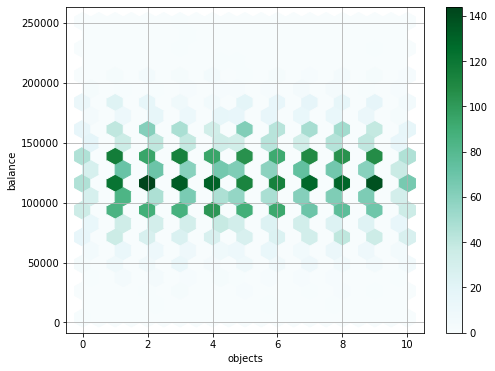

'Коэффициент корреляции между переменными objects и balance равен 0.005826615482640935'

'products - balance'

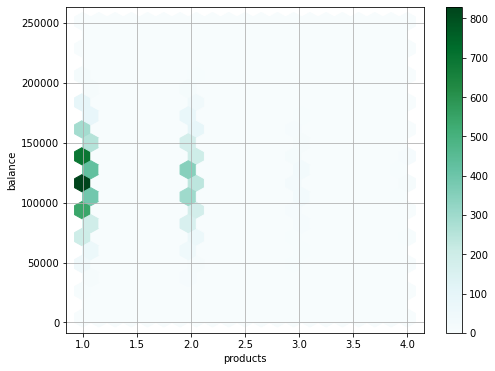

'Коэффициент корреляции между переменными products и balance равен -0.001027484583638291'

'credit_card - balance'

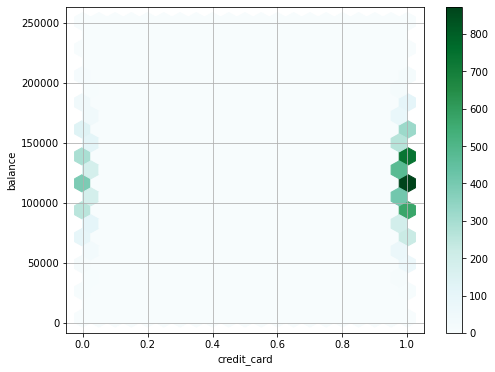

'Коэффициент корреляции между переменными credit_card и balance равен 0.006721201809249674'

'loyalty - balance'

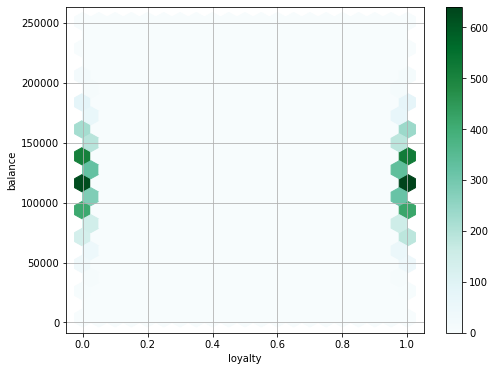

'Коэффициент корреляции между переменными loyalty и balance равен -0.020417828294281456'

'estimated_salary - balance'

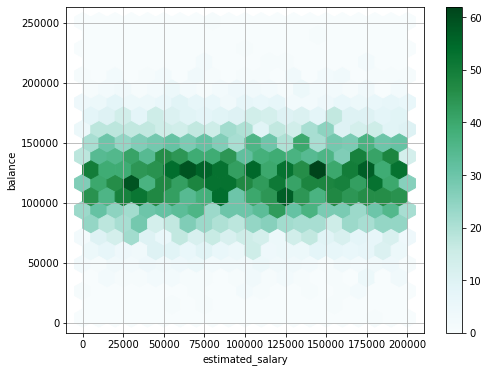

'Коэффициент корреляции между переменными estimated_salary и balance равен -0.001856488582150286'

'churn - balance'

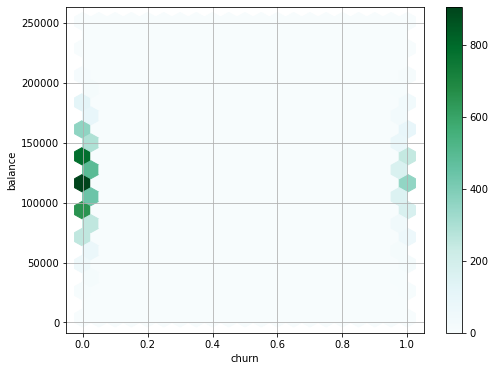

'Коэффициент корреляции между переменными churn и balance равен 0.01720779085918185'

'city_ростов великий - balance'

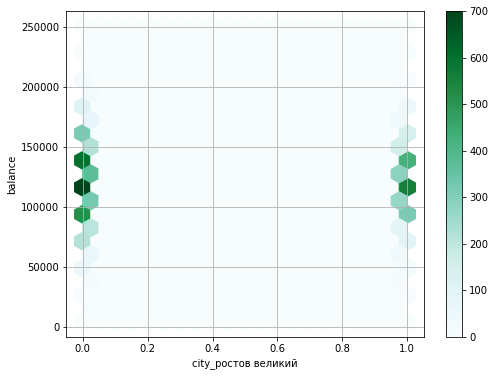

'Коэффициент корреляции между переменными city_ростов великий и balance равен -0.0026041662843681096'

'city_рыбинск - balance'

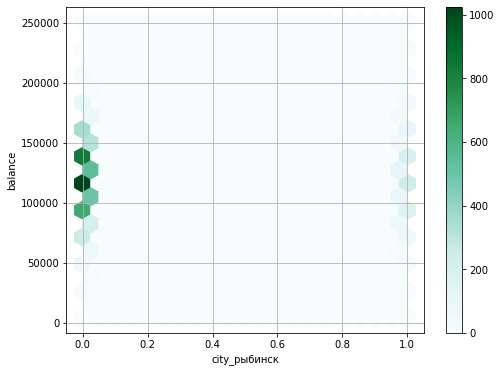

'Коэффициент корреляции между переменными city_рыбинск и balance равен -0.00020796476390006228'

'city_ярославль - balance'

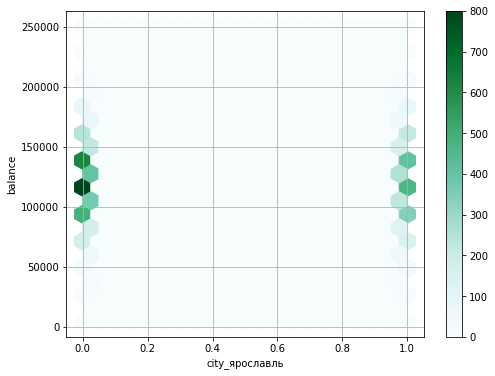

'Коэффициент корреляции между переменными city_ярославль и balance равен 0.0027588137419281697'

'gender - balance'

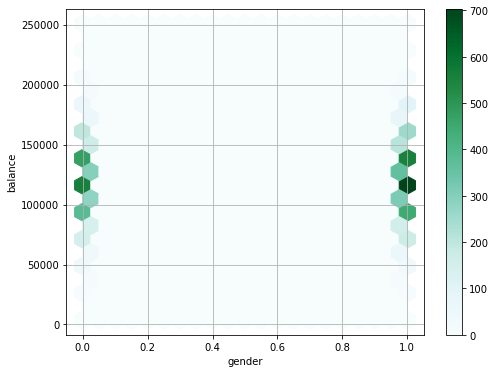

'Коэффициент корреляции между переменными gender и balance равен 0.025741606438156053'

In [8]:
for column in bank_updated.columns[1:]:
    if column != 'balance':
        display('{} - balance'.format(column))
        bank_updated.plot(x=column, y='balance', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
        plt.show()
        display('Коэффициент корреляции между переменными {} и balance равен {}'
                .format(column, bank_updated['balance'].corr(bank_updated[column])))

Таким образом, как видно из графиков и коэффициентов корреляции, **каких-либо видимых зависимостей между балансом на счёте и другими приведёнными факторами нет**. Корреляция везде очень близка к нулю. Это значит, что заполнять пропуски в столбце `balance` на основе прочих данных датасета не очень рационально, так как пропущенных значений много, а связи с имеющимися переменными почти нулевые. Такое заполнение только исказит данные.

Придётся оставить пропуски как есть.

## Исследовательский анализ данных

Изучим средние значения и стандартные отклонения признаков: <a id='describe'></a>

In [9]:
bank_updated.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_ростов великий,city_рыбинск,city_ярославль,gender
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.501400,0.545700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.500023,0.497932
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000


Из предварительного анализа можно сделать следующие выводы:
* Средний *балл кредитного скоринга* среди пользователей банка составляет **650** (почти равен медианному), разброс значений большой;
* Средний *возраст клиентов* - **около 40 лет**, стандартное отклонение также высокое: возраст варьируется от 18 до 92 лет;
* Среднее *количество объектов в собственности* у клиента составляет **5** (равно медианному значению), разброс большой, значения варьируются от 0 до 10;
* Среднее *значение баланса на счёте* равно **119827**, стандртное отклонение большое;
* Среднее *количество продуктов* в пользовании у клиента составляет **1.5** (медианное - 1, т. е. *по крайней мере 50% клиентов банка пользуются только одним продуктом*), при этом значения варьируются от 1 до 4;
* У **70.55%** клиентов банка есть *кредитная карта*;
* **51.51%** клиентов рассматриваются банком как *активные*;
* Средняя *заработная плата* клиента равна **100090** (примерно равна медианной), *среднее отклонение очень большое* (почти в два раза больше даже, чем среднее отклонение по балансу на счёте);
* *25.09% клиентов проживают в Ростове Великом, 24.77% - в Рыбинске, 50.14% - в Ярославле*;
* Количество *женщин и мужчин* среди клиентов банка *примерно одинаково* (мужчин на 5% больше);
* В *отток* ушли **20.37%** клиентов.

Сгруппируем данные по значению столбца `churn`:

In [10]:
bank_churn = bank_updated.drop('user_id', axis=1).groupby('churn').agg('mean').reset_index()

bank_churn

,churn,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,city_ростов великий,city_рыбинск,city_ярославль,gender
0,0,651.853196,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772,0.212859,0.259199,0.527942,0.572523
1,1,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531,0.399607,0.202749,0.397644,0.440844


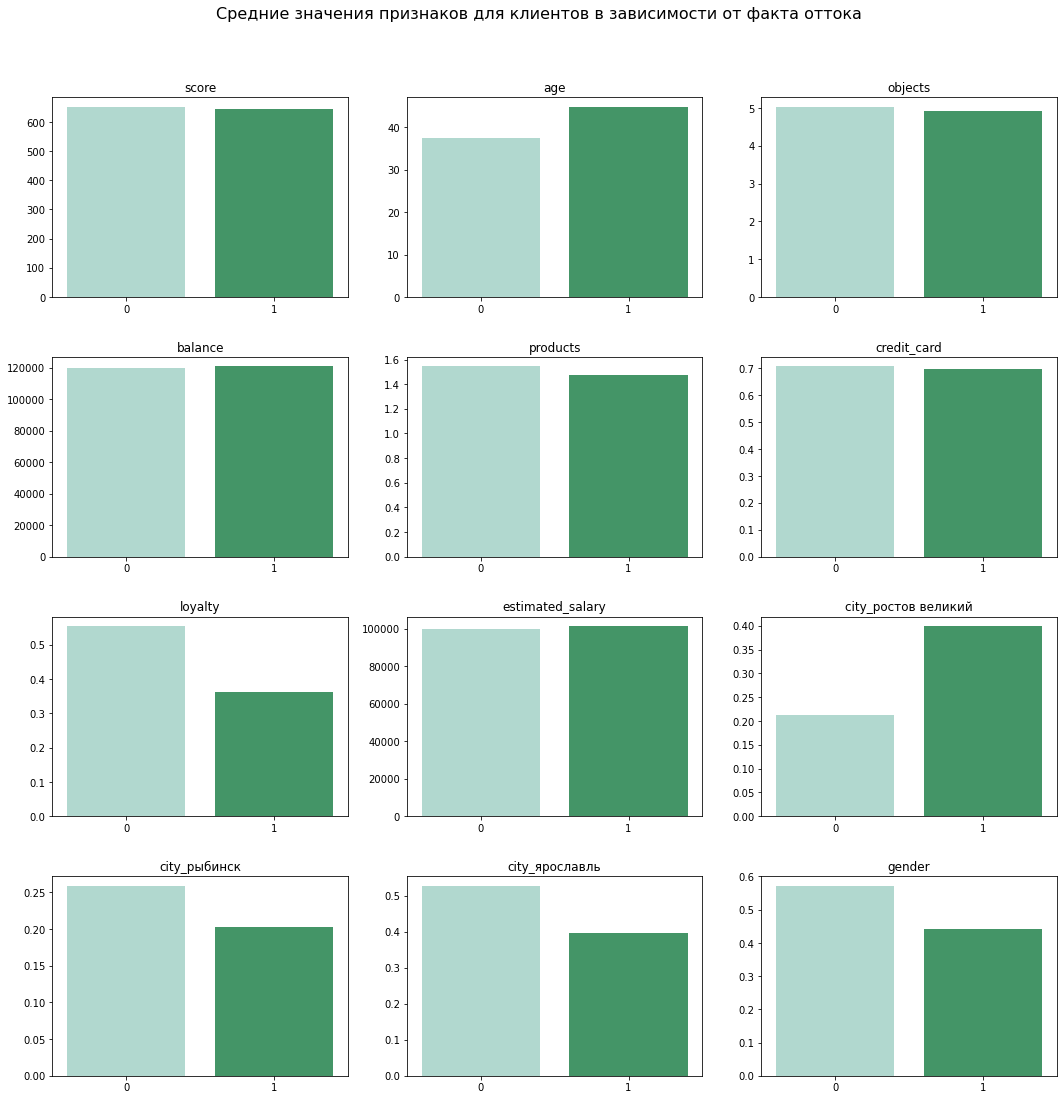

In [11]:
# визуализируем:
fig, axes = plt.subplots(4, 3)
fig.suptitle('Средние значения признаков для клиентов в зависимости от факта оттока', fontsize=16, y=0.95)
for index, value in enumerate(bank_churn.columns[1:]):
    ax = plt.subplot(4, 3, index+1)
    sns.barplot(x='churn', y=value, data=bank_churn, palette=sns.color_palette('BuGn', 2))
    plt.xlabel('')
    plt.ylabel('')
    plt.title(value)
fig.set_figheight(18)
fig.set_figwidth(18)
plt.subplots_adjust(hspace=0.3)
plt.show()

Так, из столбчатых диаграмм видно, что:
* Между ушедшими и не ушедшими в отток клиентами в среднем не наблюдается различий в кредитном скоринге, количестве объектов в собственности, балансе по счёту, количестве используемых продуктов, факту наличия кредитной карты и уровне заработной платы;
* *В среднем ушедшие в отток клиенты старше оставшихся в банке* (средний возраст - **44.8 против 37.4**);
* *Среди ушедших в отток клиентов в среднем гораздо меньше "активных"* (**36.1% против 55.5%**);
* *Примерно по 40% ушедших в отток клиентов проживают в Ростове Великом и Ярославле, при этом 50% оставшихся клиентов также живёт в Ярославле, в Ростове Великом - всего 21%*;
* *В среднем женщины уходят в отток несколько чаще*: среди ушедших в отток клиентов 44% мужчин, среди оставшихся - 57%.

Таким образом, наибольшие различия между ушедшими и не ушедшими в отток клиентами замечены по таким признакам, как активность, пол, место жительства, а также возраст.

Построим столбчатые гистограммы распредления, исходя из признака оттока:

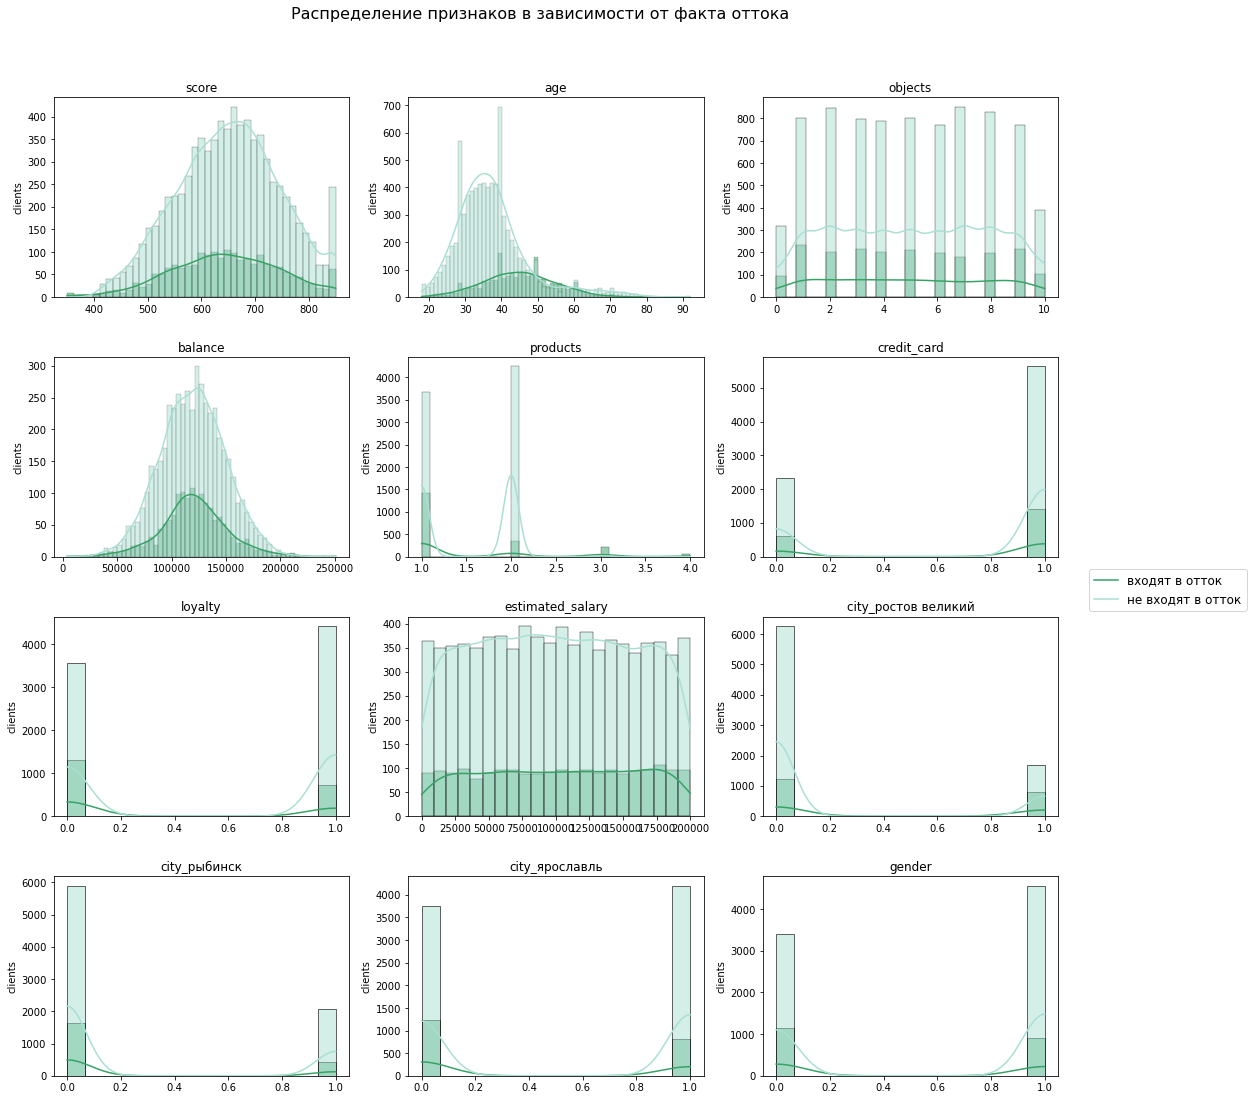

In [12]:
fig, axes = plt.subplots(4, 3)
fig.suptitle('Распределение признаков в зависимости от факта оттока', fontsize=16, y=0.95)
for index, value in enumerate(bank_updated.drop(['user_id', 'churn'], axis=1).columns):
    ax = plt.subplot(4, 3, index+1)
    sns.histplot(data=bank_updated, x=value, hue='churn', kde=True, palette=sns.color_palette('BuGn', 2), legend=False)
    plt.xlabel('')
    plt.ylabel('clients')
    plt.title(value)
fig.set_figheight(18)
fig.set_figwidth(18)
plt.subplots_adjust(hspace=0.3)
fig.legend(['входят в отток', 'не входят в отток'], loc='center right', bbox_to_anchor=(1.05, 0.5), fontsize=12, frameon=True)
plt.show()

В целом анализ гистограмм вторит уже сделанным выводам: распределения по многим факторам очень похожи, однако можно заметить следующие особенности:
* распределение возраста среди ушедших в отток клиентов гораздо более рассеянное, а среднее значение сильно смещено вправо относительно тех, кто остался;
* клиенты, не ушедшие в отток, чаще всего пользуются двумя продуктами банка, клиенты, ушедшие в отток, напротив, - очень редко;
* примерно половина клиентов банка из Ростова Великого ушла в отток.

Кроме того, подтверждаются и выводы о том, что в отток чаще уходят женщины и менее "активные" клиенты.

Таким образом, можно говорить о том, что *проживание в Ростове Великом, возраст и "неактивность" клиента являются существенными факторами оттока*. Насчёт остальных факторов сказать что-то более-менее точно пока сложно.

Построим матрицу корреляций: <a id='correlation'></a>

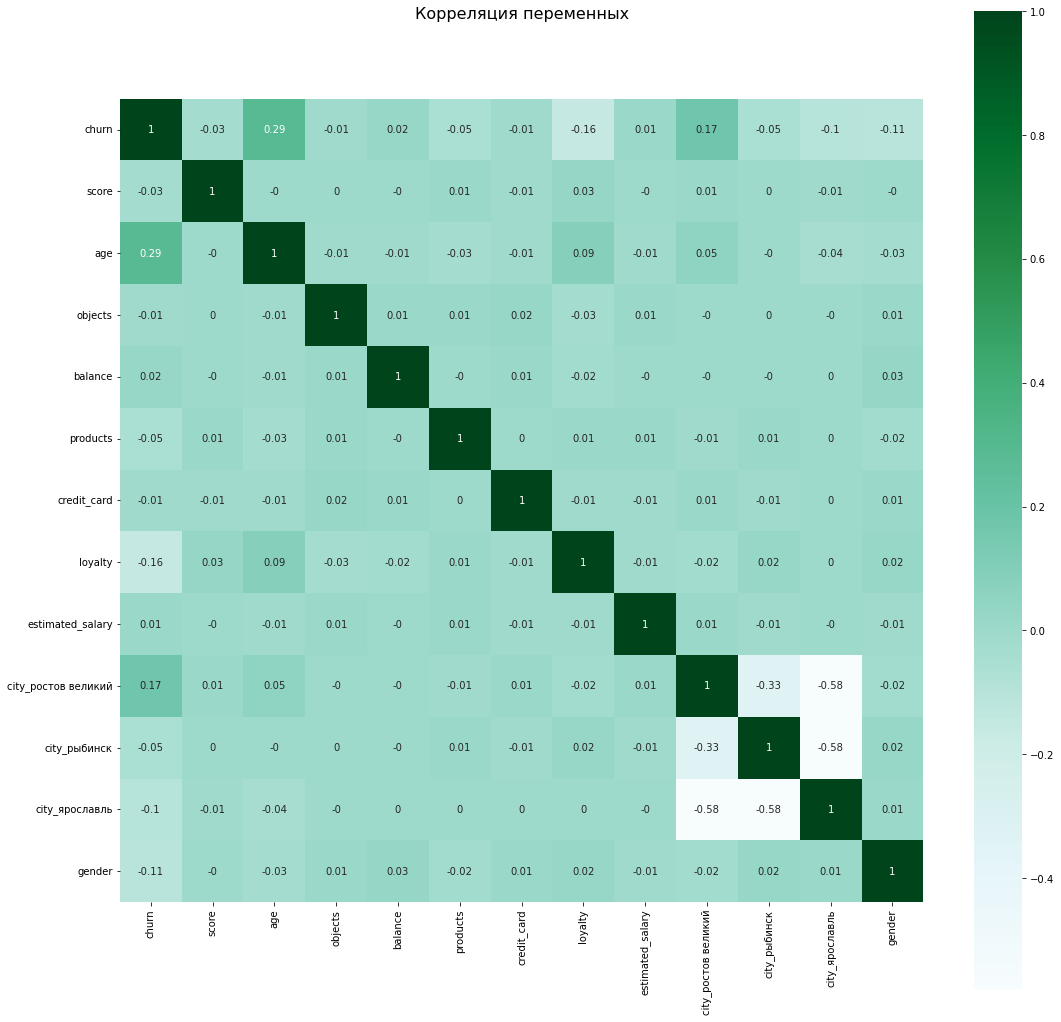

In [13]:
# переместим столбец churn в начало таблицы, чтобы было удобнее читать матрицу, и удалим столбец user_id:
cm = round(bank_updated[['churn'] + [x for x in bank_updated.columns if x != 'churn']].drop('user_id', axis=1).corr(), 2)

# визуализируем:
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cm, annot=True, square=True, cmap='BuGn', annot_kws={"size": 10})
plt.title('Корреляция переменных', fontsize=16, pad=80, loc='center')
plt.show()

Как видно из матрицы, значительной корреляции переменной `churn` с признаками не наблюдается, однако *наиболее высока она для возраста (0.29) и факта проживания в Ростове Великом (0.17)*. Кроме того, наблюдается примерно такая же по интенсивности *отрицательная корреляция с активностью клиентов (-0.16), полом (-0.11) и фактом проживания в Ярославле (-0.1)*.

Корреляции между признаками не наблюдается вообще, за исключением сравнительно сильной корреляции между переменными, определяющими место жительства (но это логично, так как они сделаны искусственно и, безусловно, взаимозависимы).

Таким образом, наиболее сильно на склонность к оттоку влияют возраст клиента, факт проживания в Ростове Великом, степень активности. Можно сказать, что **к оттоку более склонны "неактивные" клиенты, особенно женщины, старших возрастных категорий, проживающие в Ростове Великом**. Напротив, **наиболее лояльны молодые "активные" мужчины, особенно те из них, кто живёт в Ярославле**.

Чтобы проверить, корректность этих утверждений, необходимо проверить несколько гипотез:
1. Средний возраст клиентов, ушедших и не ушедших в отток, различается.
2. В среднем доля жителей Ростова Великого среди клиентов, ушедших и не ушедших в отток, различается.
3. В среднем доля "активных" клиентов среди клиентов, ушедших и не ушедших в отток, различается.
4. В среднем доля мужчин среди клиентов, ушедших и не ушедших в отток, различается.

Кроме того, проверим гипотезу различия дохода между данными группами клиентов.

## Проверка гипотез

Протестируем 5 гипотез, обозначенных в конце EDA. Для проверки предподчительнее использовать t-test, поскольку непараметрические тесты работает с рангами и никак не учитывая сами значения.

Для оценки возможности использования t-test проверим выборки на нормальность. Для этого сипользуем критерий Колмогорова:
* H0: Выборка имеет нормальное распределение.
* H1: Выборка не имеет нормальное распределение.

In [14]:
# примем уровень значимости равным 5%:
alpha = .05

# выделим признаки, по которым будем проводить тест:
features = ['estimated_salary', 'age', 'city_ростов великий', 'loyalty', 'gender']


# проверим выборки на нормальность:
for feature in features:
    display(feature, 'churn = 0')
    result_distr = st.kstest(bank_updated.loc[bank_updated['churn'] == 0, feature], 'norm')
    
    if result_distr[1] < alpha:
        display('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        display('Не получилось отвергнуть нулевую гипотезу, всё нормально')
    
    display('churn = 1')
    
    result_distr = st.kstest(bank_updated.loc[bank_updated['churn'] == 1, feature], 'norm')
    
    if result_distr[1] < alpha:
        display('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        display('Не получилось отвергнуть нулевую гипотезу, всё нормально')

'estimated_salary'

'churn = 0'

'Отвергаем нулевую гипотезу: распределение не нормально'

'churn = 1'

'Отвергаем нулевую гипотезу: распределение не нормально'

'age'

'churn = 0'

'Отвергаем нулевую гипотезу: распределение не нормально'

'churn = 1'

'Отвергаем нулевую гипотезу: распределение не нормально'

'city_ростов великий'

'churn = 0'

'Отвергаем нулевую гипотезу: распределение не нормально'

'churn = 1'

'Отвергаем нулевую гипотезу: распределение не нормально'

'loyalty'

'churn = 0'

'Отвергаем нулевую гипотезу: распределение не нормально'

'churn = 1'

'Отвергаем нулевую гипотезу: распределение не нормально'

'gender'

'churn = 0'

'Отвергаем нулевую гипотезу: распределение не нормально'

'churn = 1'

'Отвергаем нулевую гипотезу: распределение не нормально'

Поскольку выборки не распределены нормально, придётся использовать непараметрическиий тест (критерий Манна-Уитни). Чтобы процесс проверки гипотез было выполнять проще, автоматизаруем его с помощью цикла. Сформулируем нулевую и альтернативную гипотезы:
* H0: Средние значения дохода / возраста / доли жителей Ростова Великого / доли "активных" пользователей / доли мужчин среди клиентов, ушедших и не ушедших в отток, равны.
* H1: Средние значения дохода / возраста / доли жителей Ростова Великого / доли "активных" пользователей / доли мужчин среди клиентов, ушедших и не ушедших в отток, статистически различаются.

In [15]:
# напишем цикл:
for feature in features:
    result_test = st.mannwhitneyu(
    bank_updated.loc[bank_updated['churn'] == 0, feature],
    bank_updated.loc[bank_updated['churn'] == 1, feature]
    )

    display(f'P-значение для теста по {feature}: {result_test.pvalue}')

    if result_test.pvalue < alpha:
        display('Отвергаем нулевую гипотезу')
    else:
        display('Нулевую гипотезу отвергнуть не получилось')

'P-значение для теста по estimated_salary: 0.22705150930153783'

'Нулевую гипотезу отвергнуть не получилось'

'P-значение для теста по age: 3.2104014319371675e-230'

'Отвергаем нулевую гипотезу'

'P-значение для теста по city_ростов великий: 2.0453826571231207e-67'

'Отвергаем нулевую гипотезу'

'P-значение для теста по loyalty: 6.0276305535678895e-55'

'Отвергаем нулевую гипотезу'

'P-значение для теста по gender: 1.73037944372091e-26'

'Отвергаем нулевую гипотезу'

Так, проверка подтвердила ранее выдвинутые предположения: между группами клиентов, ушедших и не ушедших в отток, нет различий в уровне дохода (причём даже на уровне значимости 10%), однако есть существенные различия по всем остальным тестируемым признакам (даже на уровне значимости 0.1%).

Таким образом, **составленный ранее портрет клиентов, уходящих в отток, подтвердился.**

Хотя [корреляции между признаками не наблюдается](#correlation), на всякий случай проверим, как различаются рапределения по признакам `age`, `loyalty` и `gender` для жителей Ростова Великого и жителей других городов (чтобы исключить ситуацию, когда мы, например, выделяем возраст как признак с существенными различиями для клиентов, ушедших и не ушедщих в отток, только потому что клиенты в Ростове Великом старше и т.п.):

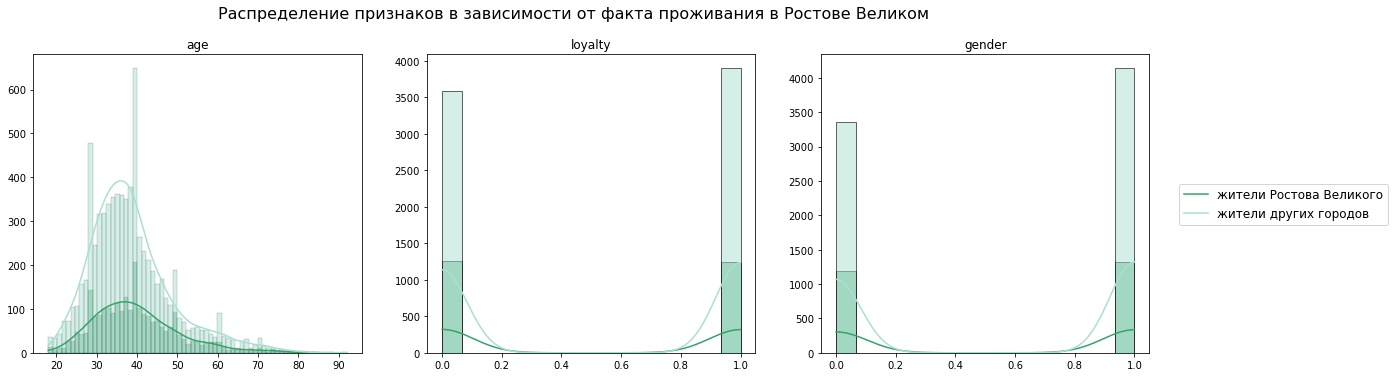

In [16]:
fig, axes = plt.subplots(1, 3)
fig.suptitle('Распределение признаков в зависимости от факта проживания в Ростове Великом', fontsize=16, y=1)
for index, value in enumerate(['age', 'loyalty', 'gender']):
    ax = plt.subplot(1, 3, index+1)
    sns.histplot(data=bank_updated, x=value, hue='city_ростов великий', kde=True, palette=sns.color_palette('BuGn', 2), legend=False)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(value)
fig.set_figheight(5.5)
fig.set_figwidth(20)
fig.legend(['жители Ростова Великого', 'жители других городов'], loc='center right', bbox_to_anchor=(1.07, 0.5), fontsize=12, frameon=True)
plt.show()

Так, распределения по всем трём признакам для жителей Ростова Великого и для жителей других городов очень похожи.

Таким образом, статистически значимыми факторами, влияющими на отток, являются **возраст клиента, его активность, пол и факт проживания в Ростове Великом**.

## Выводы

Перед началом анализа была проведена предобработка данных, в ходе которой:
1. стили заголовков были преведены к "змеиному регистру";
2. были обнаружены пропуски в столбце `balance`, однако заполнить их, не исказив данные, оказалось невозможным;
3. категориальные строчные переменные были преобразованы с помощью функции `get_dummies`;
4. дубликатов обнаружены не было, неподходящих типов данных тоже.

В ходе исследовательского анализа данных было выделено несколько признаков, которые влияют на склонность клиентов к оттоку:
1. *возраст клиента* (чем он выше, тем клиент более склонен уйти из банка);
2. *факт проживания в Ростове Великом* (клиенты из этого города более склонны уйти из банка);
3. *активность клиента* (чем она выше, тем менее клиент склонен к оттоку);
4. *пол* (женщины склонны к оттоку больше мужчин).

Проверка соответствующих гипотез подтвердила данные выводы, при этом отсутствие взаимосвязи между признаками говорит о том, что каждый из данных факторов влияет на факт оттока независимо. Таким образом, можно сказать, что наиболее склонными к оттоку являются **"неактивные" клиенты, особенно женщины, старших возрастных категорий, проживающие в Ростове Великом**.

Можно выделить несколько **причин** такого воздействия данных признаков на факт оттока:
* Банк *не оказывает услуги, необходимые клиентам старших возрастных категорий и женщинам* (например, невозможность использования материнского капитала, получения пенсии в данныом банке; непредоставление кредитов на определённые цели (например, на оплату частного детского сада) / ипотек людям старше 40 лет и т. д.).
* В Ростове Великом банк *представлен недостаточно хорошо*, из-за чего там затруднено обслуживание местных клиентов, либо в городе *есть сильные конкуренты* (возможно, и то, и другое одновременно).
* *Активность клиента отражает его удовлетворение услугами банка*, поэтому логично, что более "активные" клиенты реже его покидают.

В связи с этим можно дать следующие **рекомендации** по повышению удержания клиентов:
1. Пересмотреть спектр предоставляемых услуг, *добавить больше услуг для женщин и людей старших возрастных категорий*.
2. Проанализировать проблему представительств банка *в Ростове Великом*, по результам *улучшить работу филиалов* в городе (возможно, увеличить их количество). Если дело в конкурентах, по возможности предложить более выгодные условия.
3. *Стимулировать активность клиентов*: предоставлять льготы, выгодные условия "активным" клиентам, рекламировать программы лояльности и т.д.